In [19]:
# WARNING SETTING
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in divide")

In [20]:
# DEPENDENCIES
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# excitation generation
import ambient_vibration
import earthquake
import impact
import strongwind

# structure modelling
import model_build

# response calculation
import newmark_beta

In [21]:
# CONFIGURATION

## STRUCTURE
nDOF = 5

## SELECTED TWO FLOORS FOR OBSERVATION
node1 = 2
node2 = 5

## GRAVITY
g = 9.81 # m/s^2

## SELECTED FLOOR FOR STIFFNESS REDUCTION
node_damage = 3

## STRUCTURE PROPERTIES
me = 9e6
ke = 1e11
zeta = 0.001

## DAMAGE SEVERITY VECTOR
# damage_severity_vec = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
damage_severity_vec = np.array([0.01, 0.05, 0.1, 0.5])
len_damage_severity_vec = len(damage_severity_vec)

## NOISE LEVEL VECTOR
# noise_level_vec = np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05])
noise_level_vec = np.array([0.001, 0.005, 0.01, 0.05])
len_noise_level_vec = len(noise_level_vec)  

## SIGNAL SETUP
signal_length = 6000 # num of points
dt = 0.01 # sec
signal_duration = signal_length * dt # sec 

## EXCITATION - RELATED - EARTHQUAKE
eq_strength = 0.6 # strength of the earthquake
eq_duration = 20.0 # duration of the earthquake
omegag = 15 # central frequency
zetag = 0.6 # damping ratio of the ground
fac_time = 12.21 # factor for time modulation
pos_time1 = 0.1 # positive time 1, to control the time modulation curve shape
pos_time2 = 0.5 # positive time 2, to control the time modulation curve shape


In [22]:
## DATA MATRICES

num_samples = 100 # number of samples for each type of excitation

## EXCITATION
EXCITATION_EQ = np.zeros((num_samples, nDOF, signal_length))

### print the size of the matrices
print('EXCITATION_EQ shape: ', EXCITATION_EQ.shape)

## MODEL - INTACT

### Mass matrix, stiffness matrix, damping matrix

M, K, C = model_build.model_build(nDOF, me, ke, zeta, None, 0)

print('Mass matrix       M shape: ', M.shape)
print('Stiffness matrix  K shape: ', K.shape)
print('Damping matrix    C shape: ', C.shape)

## RESPONSE
RESPONSE_AV = np.zeros((num_samples, nDOF, signal_length))
RESPONSE_EQ = np.zeros((num_samples, nDOF, signal_length))

### print the size of the matrices
print('RESPONSE_AV shape: ', RESPONSE_AV.shape)
print('RESPONSE_EQ shape: ', RESPONSE_EQ.shape)

EXCITATION_EQ shape:  (100, 5, 6000)
Mass matrix       M shape:  (5, 5)
Stiffness matrix  K shape:  (5, 5)
Damping matrix    C shape:  (5, 5)
RESPONSE_AV shape:  (100, 5, 6000)
RESPONSE_EQ shape:  (100, 5, 6000)


In [23]:
# Only the selected two floors are required

In [24]:
# EXCITATION GENERATION

## EARTHQUAKE
for i in range(num_samples):
    # print progress
    if i%50 == 0:
        print('EQ %d / %d' % (i, num_samples))
    eq_temp = earthquake.earthquake_gen(signal_length, dt, eq_strength, eq_duration, omegag, zetag, fac_time, pos_time1, pos_time2)
    for j in range(nDOF):
        EXCITATION_EQ[i, j, :] = eq_temp

print('EXCITATION_EQ generated.')



EQ 0 / 100
EQ 50 / 100
EXCITATION_EQ generated.


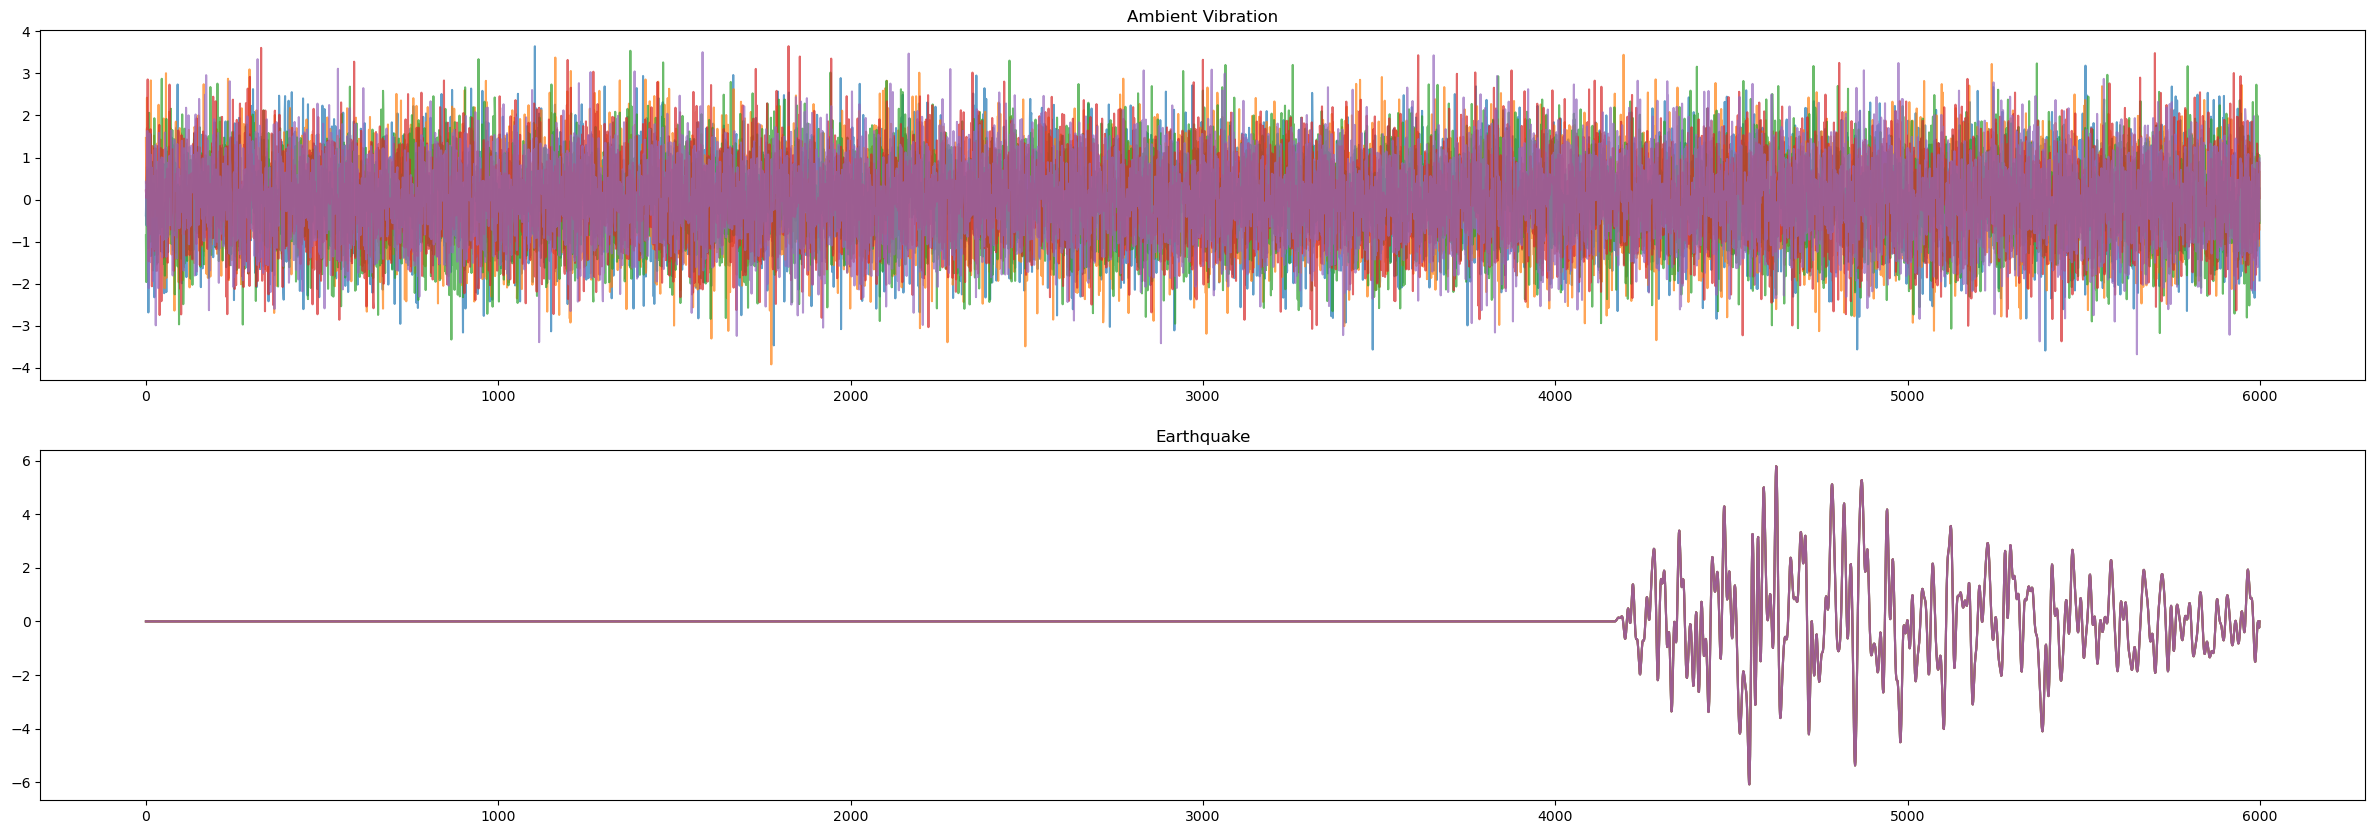

In [25]:
# VISUALIZATION of the EXCITATION

## determine an index to check
index_1 = 0

## subplot to show the excitation signals, each subplot contains all the DOFs
plt.figure(figsize=(30, 10))

## AMBIENT VIBRATION
plt.subplot(2, 1, 1)
plt.plot(EXCITATION_AV[index_1, :, :].T, alpha=0.7)
plt.title('Ambient Vibration')

## EARTHQUAKE
plt.subplot(2, 1, 2)
plt.plot(EXCITATION_EQ[index_1, :, :].T, alpha=0.7)
plt.title('Earthquake')

plt.show()

In [26]:
# RESPONSE CALCULATION

## AMBIENT VIBRATION
for i in range(num_samples):
    # print progress
    if (i+1)%50 == 0:
        print('AV %d / %d' % (i+1, num_samples))
    
    RESPONSE_AV[i, :, :] = np.array(newmark_beta.newmark_beta(signal_length, nDOF, M, K, C, EXCITATION_AV[i, :, :] , dt))

## EARTHQUAKE
for i in range(num_samples):
    # print progress
    if (i+1)%50 == 0:
        print('EQ %d / %d' % (i+1, num_samples))
        
    RESPONSE_EQ[i, :, :]= np.array(newmark_beta.newmark_beta(signal_length, nDOF, M, K, C, EXCITATION_EQ[i, :, :], dt))

AV 50 / 100
AV 100 / 100
EQ 50 / 100
EQ 100 / 100
